# Stations
[Kaggle: SF Bay Area Bike Share](https://www.kaggle.com/benhamner/sf-bay-area-bike-share)

In [3]:
import pandas as pd
import data_source as ds
# help(ds) - to dig in

df = ds.loadDataset('station');
print("Stations: Got %d samples" % ( len(df) ));
df.head()

Stations: Got 70 samples


id                               name        lat        long  dock_count  \
0   2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1   3              San Jose Civic Center  37.330698 -121.888979          15   
2   4             Santa Clara at Almaden  37.333988 -121.894902          11   
3   5                   Adobe on Almaden  37.331415 -121.893200          19   
4   6                   San Pedro Square  37.336721 -121.894074          15   

       city installation_date  
0  San Jose          8/6/2013  
1  San Jose          8/5/2013  
2  San Jose          8/6/2013  
3  San Jose          8/5/2013  
4  San Jose          8/7/2013

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
id                   70 non-null int64
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


## Missing data

We see that there is no missing data, see 'non-null' above.  
Just to be sure that non-null includes NaNs: 

In [7]:
df.isna().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

## Data types

*  Let's make sure that ids are unique, and make _id_ column an index.
*  See what are all the possible values for _city_.
*  Convert *installation_date* to a date type.

In [16]:
uniqueIds = len(df['id'].unique()) == df['id'].count();
print("Id column holds unique values: ", uniqueIds);

df.set_index('id', inplace=True);
df['installation_date'] = pd.to_datetime(df['installation_date'], dayfirst=True);

print("City colmn values: ");
df['city'].unique()

Id column holds unique values:  True
City colmn values: 


array(['San Jose', 'Redwood City', 'Mountain View', 'Palo Alto',
       'San Francisco'], dtype=object)

## Some questions

*  How many stations were installed on different dates?
*  How many docks?

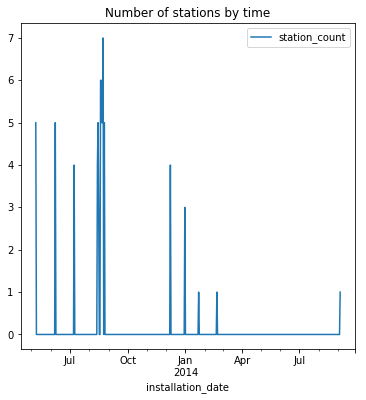

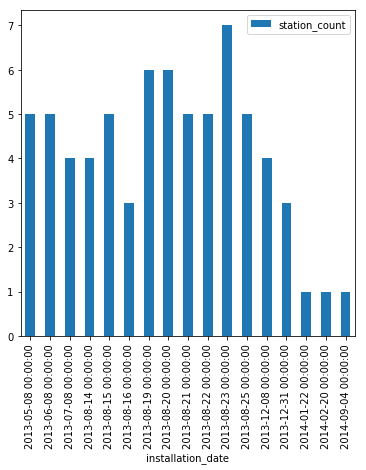

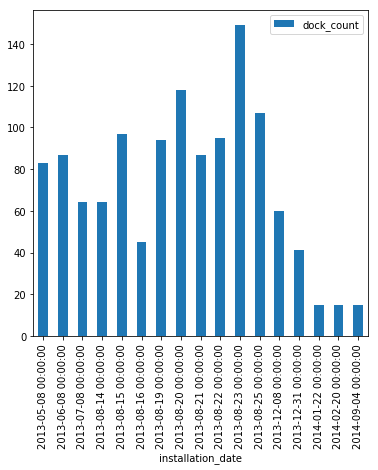

In [68]:
installFreq = df[['dock_count', "installation_date"]].groupby([pd.Grouper(key="installation_date", freq="D", sort=True)]);

numOfStations = installFreq.count();
numOfStations.columns = ['station_count']
numOfStations.plot(title="Number of stations by time");

numOfStations = numOfStations[numOfStations['station_count'] != 0];
numOfStations.plot(kind="bar");

numOfDocks = installFreq.sum();
numOfDocks = numOfDocks[numOfDocks['dock_count'] != 0];
numOfDocks.plot(kind="bar");

# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,4))
# plt.rcParams["figure.figsize"] = (6,6)
# fig, axes = plt.subplots(nrows=2, ncols=2)


# numOfStations.plot(ax=axes[1,1]);
# plt.figure(figsize=(12,4))